<a href="https://colab.research.google.com/github/kunyoungkim/pandas_basic/blob/main/melt().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 예시 데이터 생성
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [85, 90, 78],
    'English': [88, 79, 85],
    'Science': [92, 85, 89]
})

# melt 함수로 데이터를 긴 형식으로 변환
pd.melt(df, id_vars='Name', value_vars=['Math', 'English', 'Science'])

,Name,variable,value
0,Alice,Math,85
1,Bob,Math,90
2,Charlie,Math,78
3,Alice,English,88
4,Bob,English,79
5,Charlie,English,85
6,Alice,Science,92
7,Bob,Science,85
8,Charlie,Science,89


In [2]:
# var_name과 value_name 옵션 사용
pd.melt(df, id_vars='Name', value_vars=['Math', 'English', 'Science'], var_name='Subject', value_name='Score')

,Name,Subject,Score
0,Alice,Math,85
1,Bob,Math,90
2,Charlie,Math,78
3,Alice,English,88
4,Bob,English,79
5,Charlie,English,85
6,Alice,Science,92
7,Bob,Science,85
8,Charlie,Science,89


In [3]:
# value_vars 생략
pd.melt(df, id_vars='Name')

,Name,variable,value
0,Alice,Math,85
1,Bob,Math,90
2,Charlie,Math,78
3,Alice,English,88
4,Bob,English,79
5,Charlie,English,85
6,Alice,Science,92
7,Bob,Science,85
8,Charlie,Science,89


In [4]:
# 예시 데이터 생성
df_multi_id = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Class': ['Math101', 'Math101', 'Math101'],
    'Midterm': [85, 90, 78],
    'Final': [88, 79, 85]
})

# 여러 개의 id_vars 사용
pd.melt(df_multi_id, id_vars=['Name', 'Class'], value_vars=['Midterm', 'Final'])

,Name,Class,variable,value
0,Alice,Math101,Midterm,85
1,Bob,Math101,Midterm,90
2,Charlie,Math101,Midterm,78
3,Alice,Math101,Final,88
4,Bob,Math101,Final,79
5,Charlie,Math101,Final,85


In [7]:
# 인덱스 유지
pd.melt(df, id_vars='Name', value_vars=['Math', 'English', 'Science'], ignore_index=False)

,Name,variable,value
0,Alice,Math,85
1,Bob,Math,90
2,Charlie,Math,78
0,Alice,English,88
1,Bob,English,79
2,Charlie,English,85
0,Alice,Science,92
1,Bob,Science,85
2,Charlie,Science,89


### 응용

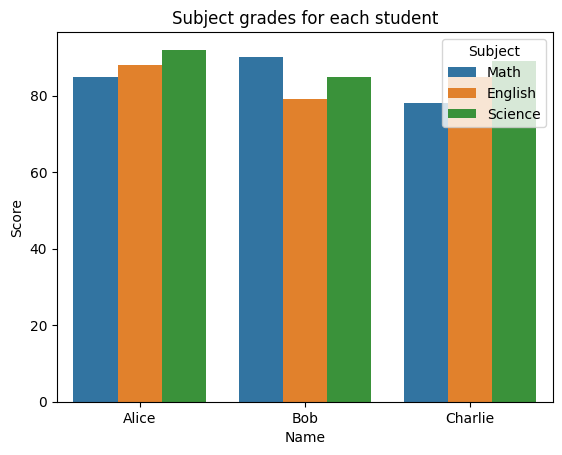

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [85, 90, 78],
    'English': [88, 79, 85],
    'Science': [92, 85, 89]
})

# 데이터를 긴 형식으로 변환
melted_df = pd.melt(df, id_vars='Name', value_vars=['Math', 'English', 'Science'], var_name='Subject', value_name='Score')

# Seaborn을 사용한 시각화
sns.barplot(x='Name', y='Score', hue='Subject', data=melted_df)
plt.title("Subject grades for each student")
plt.show()

In [11]:
# 주식 데이터 예시
stock_data = pd.DataFrame({
    'Date': ['2023-09-01', '2023-09-02', '2023-09-03'],
    'Company_A': [100, 102, 101],
    'Company_B': [98, 97, 99],
    'Company_C': [105, 107, 106]
})

# melt() 함수로 긴 형식으로 변환
pd.melt(stock_data, id_vars='Date', var_name='Company', value_name='Stock Price')

,Date,Company,Stock Price
0,2023-09-01,Company_A,100
1,2023-09-02,Company_A,102
2,2023-09-03,Company_A,101
3,2023-09-01,Company_B,98
4,2023-09-02,Company_B,97
5,2023-09-03,Company_B,99
6,2023-09-01,Company_C,105
7,2023-09-02,Company_C,107
8,2023-09-03,Company_C,106


In [12]:
# 예시 매출 데이터
sales_data = pd.DataFrame({
    'Product': ['Product A', 'Product B'],
    '2023_Q1': [200, 150],
    '2023_Q2': [210, 160],
    '2023_Q3': [205, 155]
})

# melt() 함수로 긴 형식으로 변환
pd.melt(sales_data, id_vars='Product', var_name='Quarter', value_name='Sales')

,Product,Quarter,Sales
0,Product A,2023_Q1,200
1,Product B,2023_Q1,150
2,Product A,2023_Q2,210
3,Product B,2023_Q2,160
4,Product A,2023_Q3,205
5,Product B,2023_Q3,155


In [14]:
# melt로 변환한 데이터를 다시 넓은 형식으로 복구
melted_df.pivot(index='Name', columns='Subject', values='Score')

Subject,English,Math,Science
Name,,,
Alice,88,85,92
Bob,79,90,85
Charlie,85,78,89
